In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "/content/Historico_Totalizacao_Presidente_BR_2T_2022.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='latin1')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0    CD_PLEITO                                     5286 non-null   int64 
 1   CD_ELEICAO                                     5286 non-null   int64 
 2     CD_CARGO                                     5286 non-null   int64 
 3   SG_UE_UF                                       5286 non-null   object
 4   DT_TOTALIZACAO                                 5286 non-null   object
 5   QT_SECOES_TOTAL                                5286 non-null   int64 
 6   QT_APTOS_TOTAL                                 5286 non-null   int64 
 7   QT_SECOES_TOT                                  5286 non-null   int64 
 8   QT_SECOES_TOT_ACUMULADO                        5286 non-null   int64 
 9   PE_SECOES_TOT_ACUMULADO                        5286 non-null   

Removendo os espaços nos nomes das colunas

In [3]:
df.columns = df.columns.str.strip()

In [5]:
percent_cols = [
    'PE_SECOES_TOT_ACUMULADO', 'LULA_PE_VOTOS_TOT_ACUMULADO',
    'JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO', 'BRANCO_PE_VOTOS_TOT_ACUMULADO',
    'NULO_PE_VOTOS_TOT_ACUMULADO'
]
#Convertendo string para float e substituíndo a vírgula por ponto
for col in percent_cols:
  df[col] = df[col].str.replace(',', '.').astype(float)

In [7]:
votos_estado = df.groupby('SG_UE_UF')[['LULA_QT_VOTOS_TOT', 'JAIR_BOLSONARO_QT_VOTOS_TOT']].sum()

#calculando o percentual de votos para cada candidato por estado
votos_estado['LULA_%'] = (votos_estado['LULA_QT_VOTOS_TOT'] / votos_estado.sum(axis=1)) * 100
votos_estado['BOLSONARO_%'] = (votos_estado['JAIR_BOLSONARO_QT_VOTOS_TOT'] / votos_estado.sum(axis=1)) * 100

# Exibir os resultados
votos_estado.head()

,LULA_QT_VOTOS_TOT,JAIR_BOLSONARO_QT_VOTOS_TOT,LULA_%,BOLSONARO_%
SG_UE_UF,,,,
BR,60345999,58206354,50.902405,49.097574


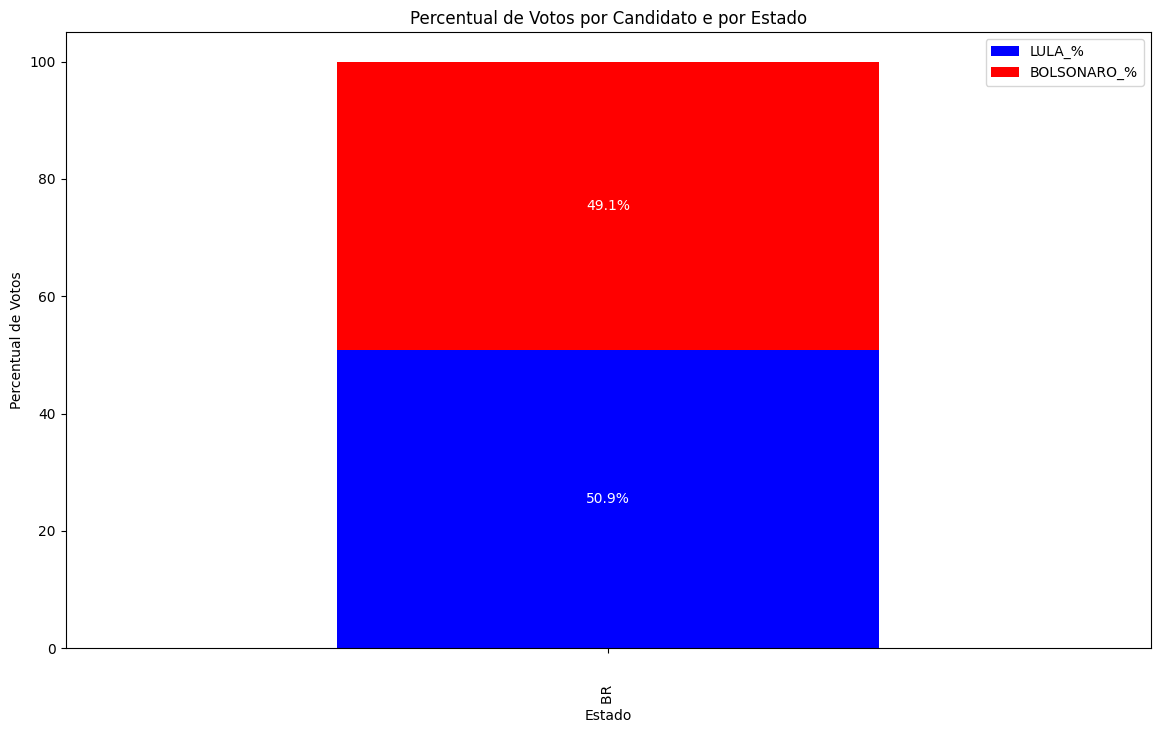

In [18]:
# Resetar o índice para tornar 'SG_UE_UF' uma coluna normal
votos_estado_reset = votos_estado.reset_index()

# Plotar o gráfico de barras empilhadas com percentuais numéricos
fig, ax = plt.subplots(figsize=(14, 8))
votos_estado_reset.plot(
    x='SG_UE_UF',
    y=['LULA_%', 'BOLSONARO_%'],
    kind='bar',
    stacked=True,
    color=['blue', 'red'],
    ax=ax
)

# Título e rótulos dos eixos
plt.title('Percentual de Votos por Candidato e por Estado')
plt.ylabel('Percentual de Votos')
plt.xlabel('Estado')

# Adicionar rótulos numéricos para os percentuais
for idx, row in votos_estado_reset.iterrows():
    ax.text(idx, row['LULA_%'] / 2, f"{row['LULA_%']:.1f}%", color="white", ha="center", va="center")
    ax.text(idx, row['LULA_%'] + (row['BOLSONARO_%'] / 2), f"{row['BOLSONARO_%']:.1f}%", color="white", ha="center", va="center")

plt.show()

In [17]:
print(votos_estado_reset.columns)

Index(['SG_UE_UF', 'LULA_QT_VOTOS_TOT', 'JAIR_BOLSONARO_QT_VOTOS_TOT',
       'LULA_%', 'BOLSONARO_%'],
      dtype='object')


In [20]:
df_complementar_filtrado = df_complementar[
    (df_complementar['NR_TURNO'] == 2) &
    (df_complementar['DS_CARGO'] == 'Presidente')
]

# Agrupar por estado e somar os votos válidos e anulados
votos_agrupados = df_complementar_filtrado.groupby('SG_UF').agg({
    'QT_VOTOS_LEGENDA_VALIDOS': 'sum',
    'QT_VOTOS_NOM_CONVR_LEG_VALIDOS': 'sum',
    'QT_TOTAL_VOTOS_LEG_VALIDOS': 'sum',
    'QT_VOTOS_NOMINAIS_VALIDOS': 'sum',
    'QT_VOTOS_LEGENDA_ANUL_SUBJUD': 'sum',
    'QT_VOTOS_NOMINAIS_ANUL_SUBJUD': 'sum'
}).reset_index()

# Calcular o total de votos válidos e anulados por estado
votos_agrupados['VOTOS_VALIDOS'] = votos_agrupados['QT_TOTAL_VOTOS_LEG_VALIDOS']
votos_agrupados['VOTOS_ANULADOS'] = (
    votos_agrupados['QT_VOTOS_LEGENDA_ANUL_SUBJUD'] + votos_agrupados['QT_VOTOS_NOMINAIS_ANUL_SUBJUD']
)

# Calcular os percentuais de votos válidos e anulados
votos_agrupados['PERCENTUAL_VALIDOS'] = (votos_agrupados['VOTOS_VALIDOS'] / votos_agrupados['VOTOS_VALIDOS'].sum()) * 100
votos_agrupados['PERCENTUAL_ANULADOS'] = (votos_agrupados['VOTOS_ANULADOS'] / votos_agrupados['VOTOS_ANULADOS'].sum()) * 100

# Exibir o DataFrame tratado
print(votos_agrupados)

   SG_UF  QT_VOTOS_LEGENDA_VALIDOS  QT_VOTOS_NOM_CONVR_LEG_VALIDOS  \
0     AC                         0                               0   
1     AL                         0                               0   
2     AM                         0                               0   
3     AP                         0                               0   
4     BA                         0                               0   
5     CE                         0                               0   
6     DF                         0                               0   
7     ES                         0                               0   
8     GO                         0                               0   
9     MA                         0                               0   
10    MG                         0                               0   
11    MS                         0                               0   
12    MT                         0                               0   
13    PA            